In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from pyod.models.pca import PCA
from pyod.models.knn import KNN
from warnings import filterwarnings
from sklearn.model_selection import train_test_split 

filterwarnings('ignore')
plt.rcParams['figure.figsize']=[18,12]

In [2]:
df=pd.read_csv('inpatientCharges.csv')
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [3]:
df.shape

(163065, 12)

In [4]:
list(df.columns)

['DRG Definition',
 'Provider Id',
 'Provider Name',
 'Provider Street Address',
 'Provider City',
 'Provider State',
 'Provider Zip Code',
 'Hospital Referral Region Description',
 ' Total Discharges ',
 ' Average Covered Charges ',
 ' Average Total Payments ',
 'Average Medicare Payments']

In [5]:
df.dtypes

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
 Total Discharges                        int64
 Average Covered Charges                object
 Average Total Payments                 object
Average Medicare Payments               object
dtype: object

In [6]:
df.rename(columns={' Average Covered Charges ':'Average Covered Charges',
                    ' Total Discharges ':'Total Discharges',
                    ' Average Total Payments ':'Average Total Payments'},inplace=True)

In [7]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [8]:
x=list(df.columns)[-3:]
for i in x:
    df[i]=df[i].apply(lambda x: float(x.split('$')[1]))

In [9]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [10]:
df.dtypes

DRG Definition                           object
Provider Id                               int64
Provider Name                            object
Provider Street Address                  object
Provider City                            object
Provider State                           object
Provider Zip Code                         int64
Hospital Referral Region Description     object
Total Discharges                          int64
Average Covered Charges                 float64
Average Total Payments                  float64
Average Medicare Payments               float64
dtype: object

In [11]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


In [12]:
df.describe(include='object')

,DRG Definition,Provider Name,Provider Street Address,Provider City,Provider State,Hospital Referral Region Description
count,163065,163065,163065,163065,163065,163065
unique,100,3201,3326,1977,51,306
top,194 - SIMPLE PNEUMONIA & PLEURISY W CC,GOOD SAMARITAN HOSPITAL,100 MEDICAL CENTER DRIVE,CHICAGO,CA,CA - Los Angeles
freq,3023,633,183,1505,13064,3653


In [13]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [14]:
# Null Value
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missed=pd.concat([total,percent],axis=1,keys=['total','percent'])
missed

,total,percent
DRG Definition,0,0.0
Provider Id,0,0.0
Provider Name,0,0.0
Provider Street Address,0,0.0
Provider City,0,0.0
Provider State,0,0.0
Provider Zip Code,0,0.0
Hospital Referral Region Description,0,0.0
Total Discharges,0,0.0
Average Covered Charges,0,0.0


In [15]:
#seggregating numerical and categorical columns
num=list(df.select_dtypes(include='number').columns)
cat=list(df.select_dtypes(include='object').columns)

In [16]:
num

['Provider Id',
 'Provider Zip Code',
 'Total Discharges',
 'Average Covered Charges',
 'Average Total Payments',
 'Average Medicare Payments']

In [17]:
cat

['DRG Definition',
 'Provider Name',
 'Provider Street Address',
 'Provider City',
 'Provider State',
 'Hospital Referral Region Description']

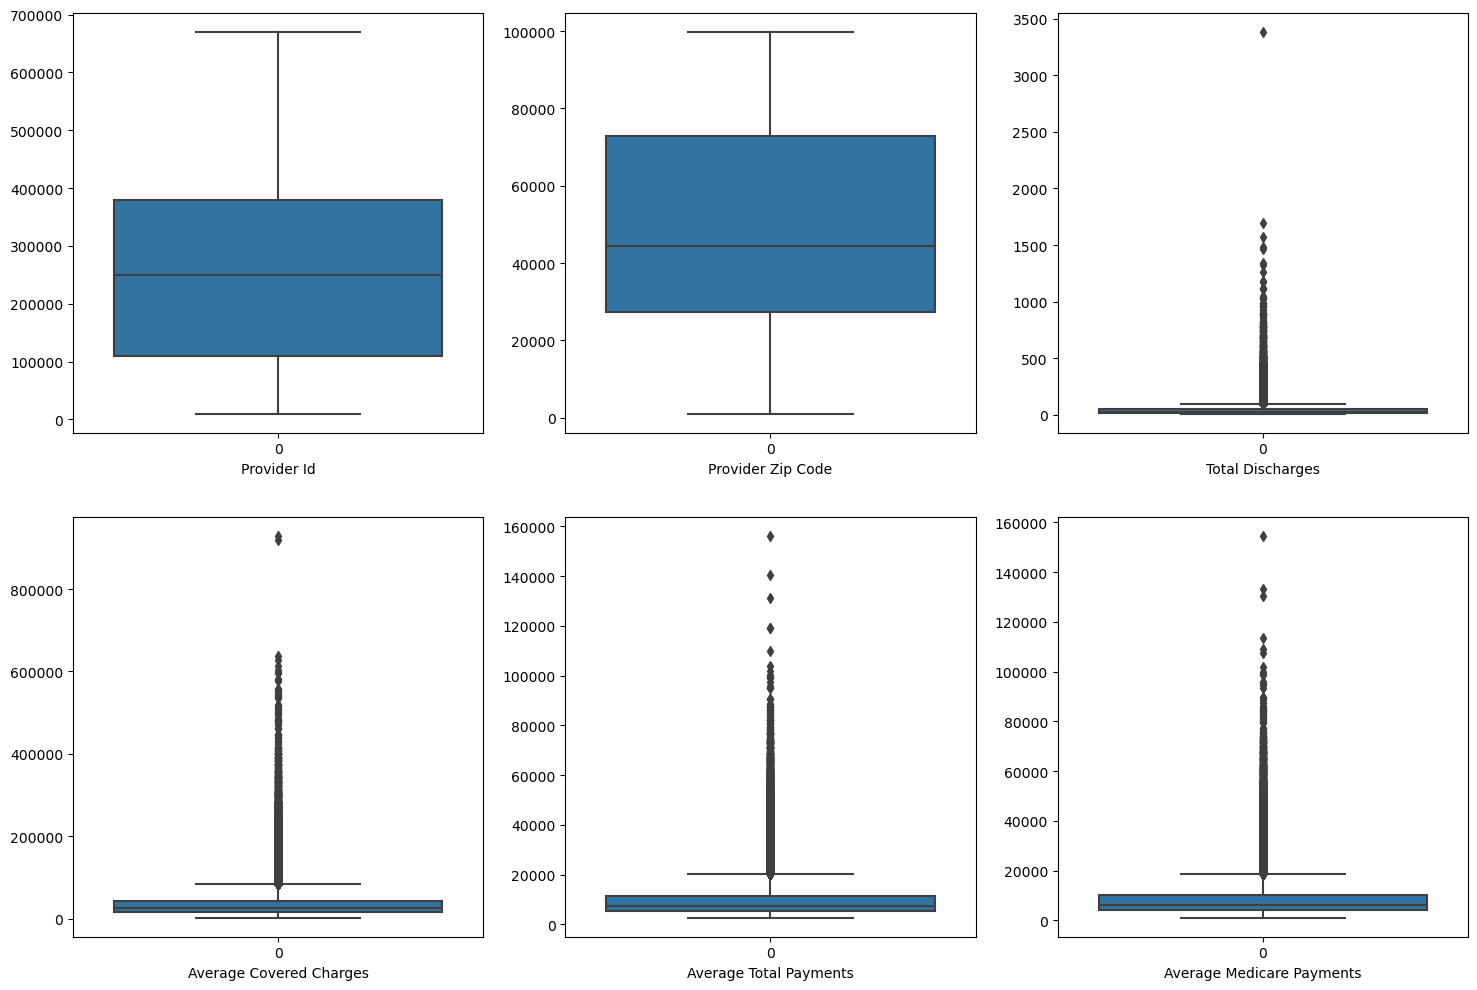

In [18]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=[18,12])
for i,j in zip(num,ax.flatten()):
    sb.boxplot(df[i],ax=j).set(xlabel=i)
plt.show()

In [19]:
# # Create a figure with 2x2 subplots
# fig = make_subplots(rows=2, cols=3)

# # Add a box plot to each subplot
# fig.add_trace(go.Box(x=df[num[0]], name=num[0]),row=1,col=1)
# fig.add_trace(go.Box(x=df[num[1]], name=num[1]),row=1,col=2)
# fig.add_trace(go.Box(x=df[num[2]], name=num[2]),row=1,col=3)
# fig.add_trace(go.Box(x=df[num[3]], name=num[3]),row=2,col=1)
# fig.add_trace(go.Box(x=df[num[4]], name=num[4]),row=2,col=2)
# fig.add_trace(go.Box(x=df[num[5]], name=num[5]),row=2,col=3)

# fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),paper_bgcolor="LightSteelBlue",width=1000,height=600)
# # Show the plot
# fig.show()

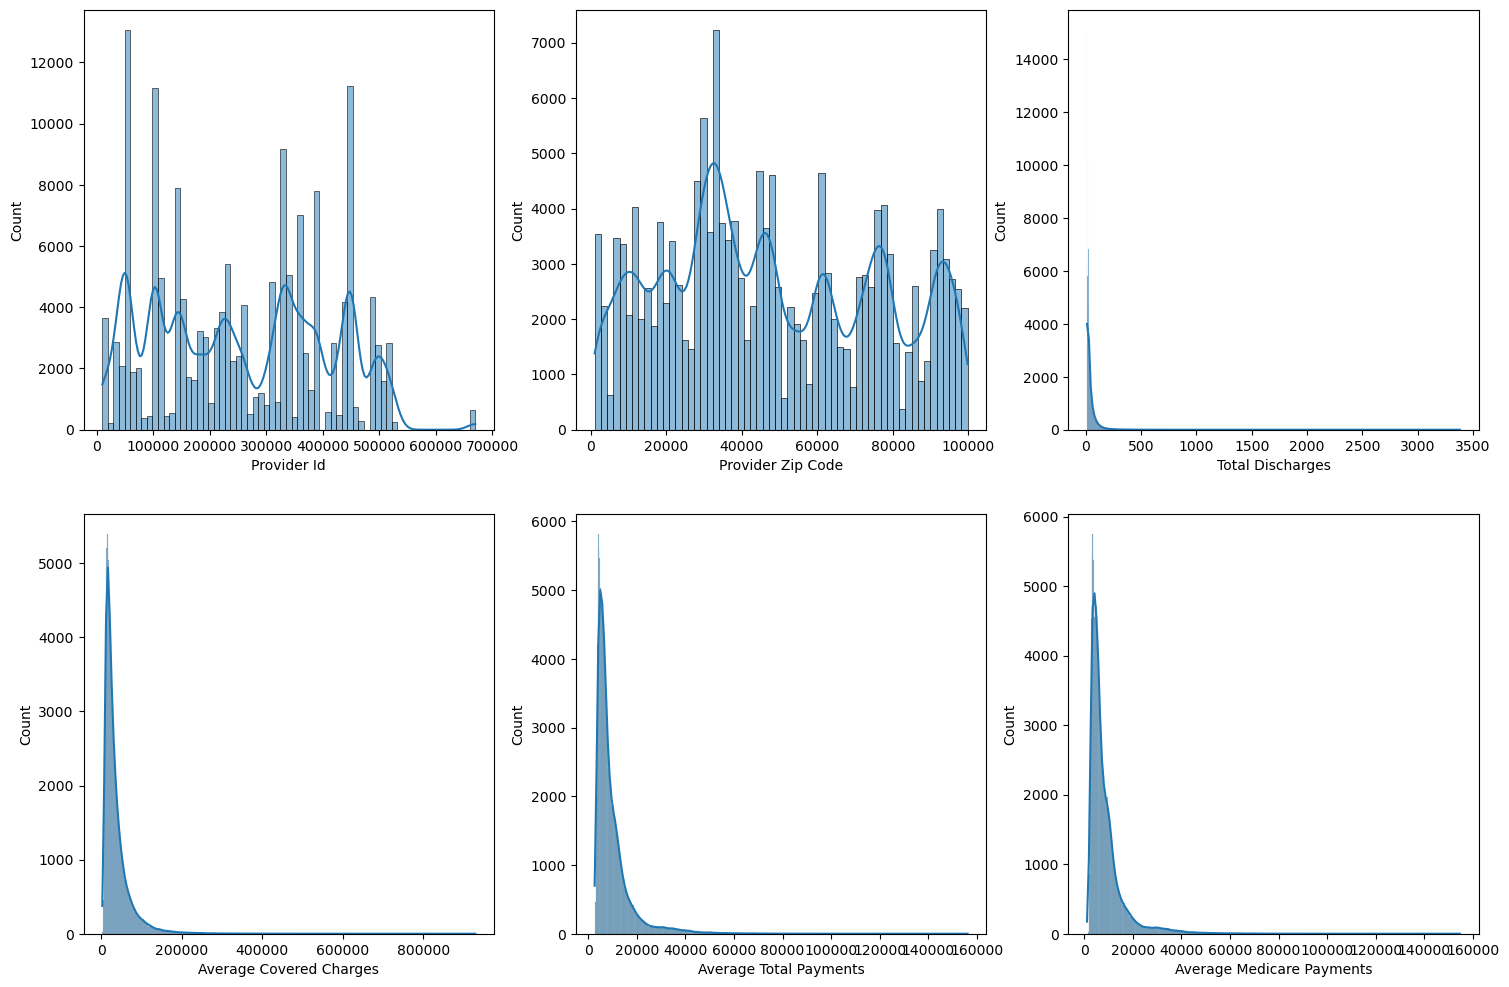

In [20]:
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=[18,12])
for i,j in zip(num,ax.flatten()):
    sb.histplot(df[i],ax=j,kde=True)
plt.show()

In [21]:
# fig = make_subplots(rows=2, cols=3)

# # Add a box plot to each subplot
# fig.add_trace(go.Histogram(x=df[num[0]], name=num[0]),row=1,col=1)
# fig.add_trace(go.Histogram(x=df[num[1]], name=num[1]),row=1,col=2)
# fig.add_trace(go.Histogram(x=df[num[2]], name=num[2]),row=1,col=3)
# fig.add_trace(go.Histogram(x=df[num[3]], name=num[3]),row=2,col=1)
# fig.add_trace(go.Histogram(x=df[num[4]], name=num[4]),row=2,col=2)
# fig.add_trace(go.Histogram(x=df[num[5]], name=num[5]),row=2,col=3)

# fig.update_layout(margin=dict(l=20, r=20, t=20, b=20),paper_bgcolor="LightSteelBlue",width=1000,height=600)
# # Show the plot
# fig.show()

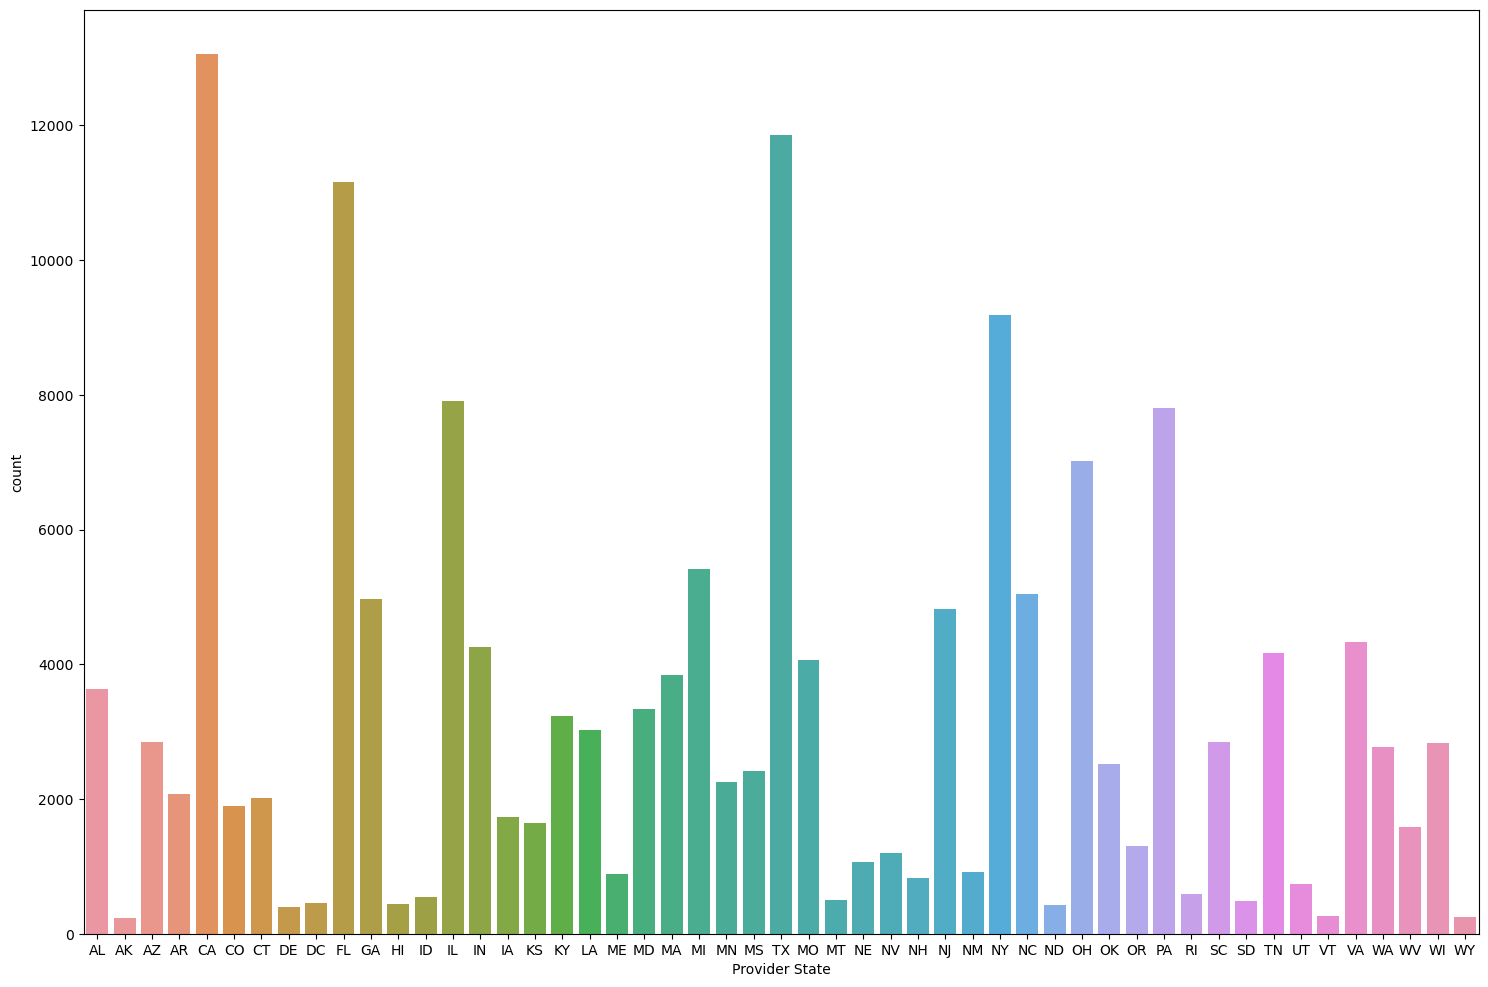

In [22]:
sb.countplot(data=df,x='Provider State')
plt.show()

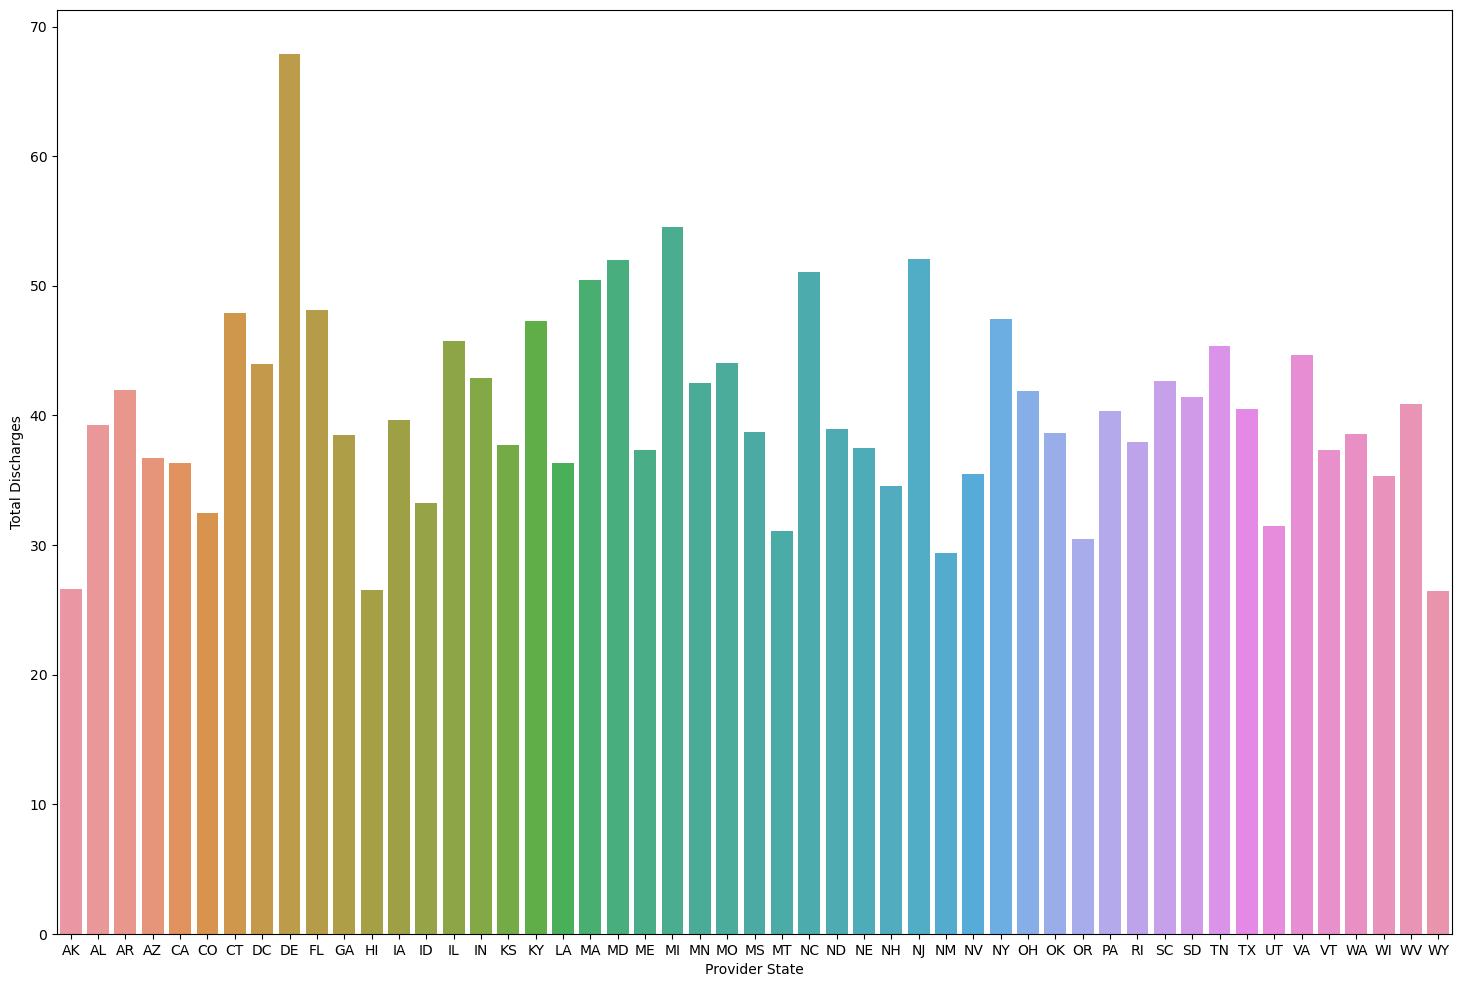

In [23]:
df1=pd.pivot_table(data=df,index='Provider State',values='Total Discharges',aggfunc='mean').reset_index()
sb.barplot(data=df1,x='Provider State',y='Total Discharges')
plt.show()

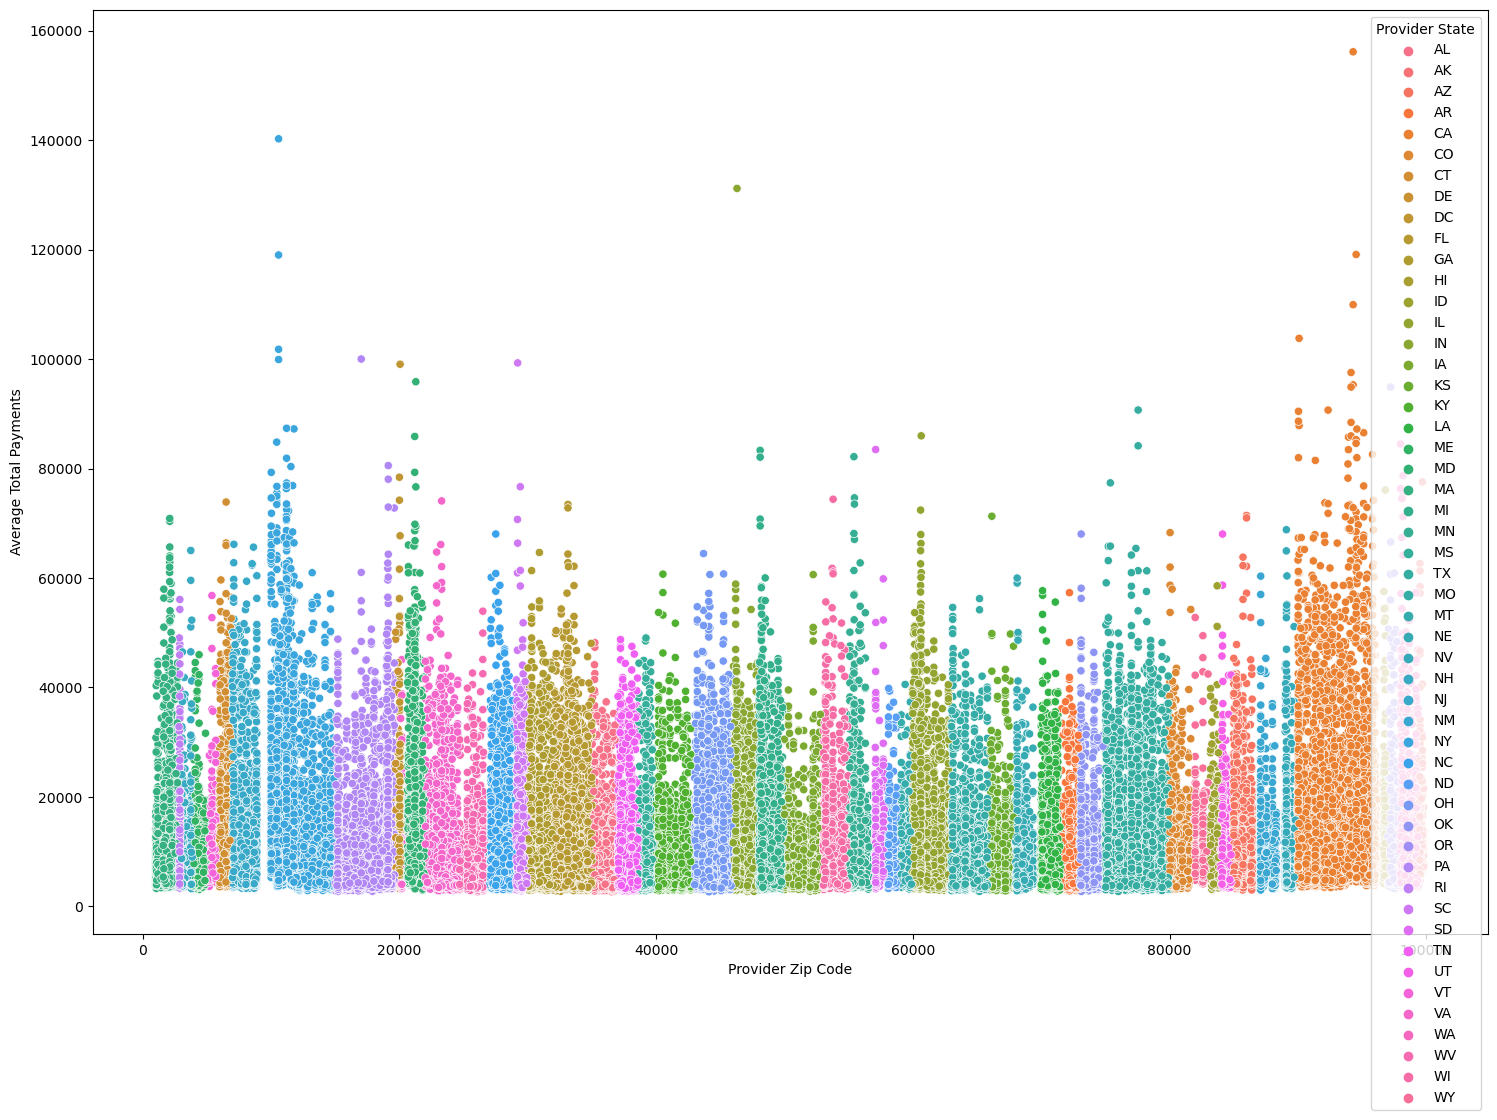

In [24]:
sb.scatterplot(data=df,x='Provider Zip Code',y='Average Total Payments',hue='Provider State')
plt.show()

In [25]:
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'NV': 'West', 'OR': 'West', 'WA': 'West','ID': 'West', 'MT': 'West', 'WY': 'West',
    'UT': 'West', 'CO': 'West', 'NM': 'West','AZ': 'West',
    
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest','ND': 'Midwest', 'MN': 'Midwest', 'SD': 'Midwest',
    'NE': 'Midwest', 'IA': 'Midwest','KS': 'Midwest', 'MO': 'Midwest',
    
    'AL': 'South', 'AR': 'South','DC': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South', 'LA': 'South',
    'MD': 'South', 'MS': 'South', 'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South'
}

df['Provider Region'] = df['Provider State'].map(state_to_region)
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Provider Region
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,South
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,South
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,South
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,South
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,South


<Axes: xlabel='Provider Region'>

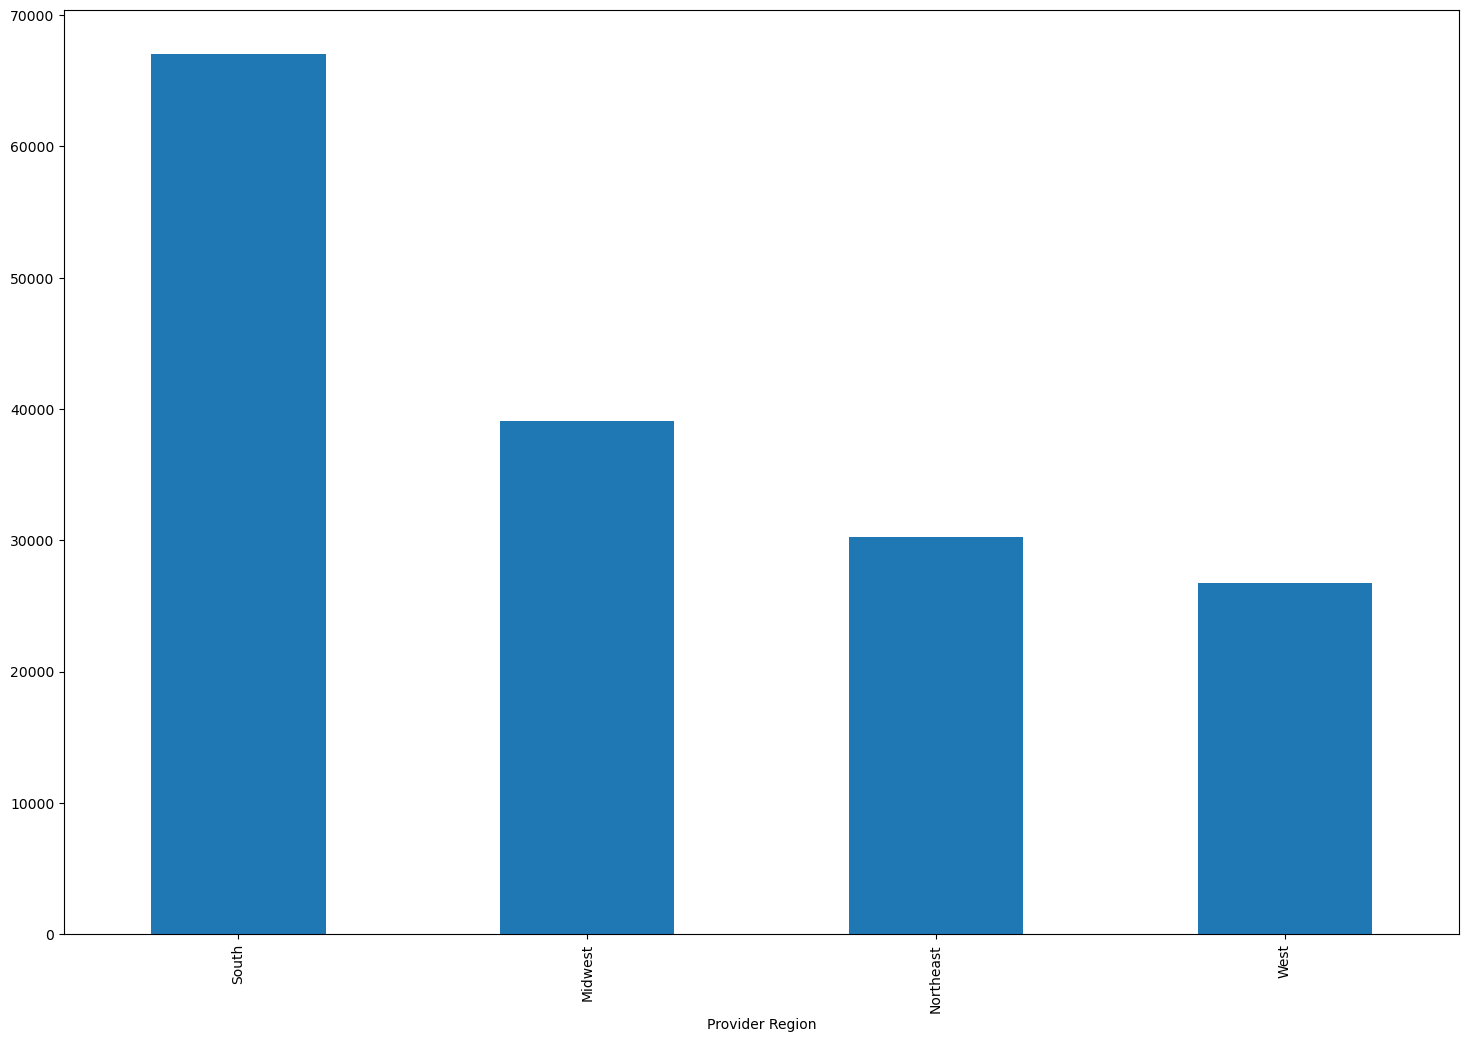

In [26]:
df['Provider Region'].value_counts().plot.bar()

In [27]:
#Z-value for the Provider Region
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['Provider Region'])
list1=list.transform('mean')
list2=list.transform('std')
data=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data.columns = [f"{col}_z-value_PR" for col in data.columns]
data.head()

,Total Discharges_z-value_PR,Average Covered Charges_z-value_PR,Average Total Payments_z-value_PR,Average Medicare Payments_z-value_PR
0,0.908503,-0.013146,-0.461808,-0.459220
1,-0.573785,-0.601873,-0.460301,-0.426420
2,-0.381280,0.138641,-0.511775,-0.506951
3,-0.362030,-0.639300,-0.514314,-0.556945
4,-0.496783,-0.057052,-0.479167,-0.445712


In [28]:
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['DRG Definition'])
list1=list.transform('mean')
list2=list.transform('std')
data1=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data1.columns = [f"{col}_z-value_DRG" for col in data1.columns]

In [29]:
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['Hospital Referral Region Description'])
list1=list.transform('mean')
list2=list.transform('std')
data2=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data2.columns = [f"{col}_z-value_Reff" for col in data2.columns]

In [30]:
list=df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']].groupby(df['Provider City'])
list1=list.transform('mean')
list2=list.transform(np.std)
data3=(df[['Total Discharges','Average Covered Charges','Average Total Payments','Average Medicare Payments']] - list1)/list2
data3.columns = [f"{col}_z-value_ProvCity" for col in data2.columns]

In [31]:
list2.isnull().sum()

Total Discharges             29
Average Covered Charges      29
Average Total Payments       29
Average Medicare Payments    29
dtype: int64

In [32]:
# df=pd.concat([df,data],axis=1)
df=pd.concat([df,data1],axis=1)
df=pd.concat([df,data2],axis=1)
df=pd.concat([df,data3],axis=1)

In [33]:
df1=df.iloc[:,13:]

In [34]:
df1.dropna(inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163034 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   Total Discharges_z-value_DRG                             163034 non-null  float64
 1   Average Covered Charges_z-value_DRG                      163034 non-null  float64
 2   Average Total Payments_z-value_DRG                       163034 non-null  float64
 3   Average Medicare Payments_z-value_DRG                    163034 non-null  float64
 4   Total Discharges_z-value_Reff                            163034 non-null  float64
 5   Average Covered Charges_z-value_Reff                     163034 non-null  float64
 6   Average Total Payments_z-value_Reff                      163034 non-null  float64
 7   Average Medicare Payments_z-value_Reff                   163034 non-null  float64
 8   Total Discharges_z-

In [38]:
# X_train, X_test=train_test_split(df1,test_size=0.20,random_state=10)
# X_train.shape,X_test.shape

((130427, 12), (32607, 12))

In [51]:
from pyod.models.pca import PCA
pca = PCA(contamination=0.05) 

In [52]:
# pca.fit(X_train)
pca.fit(df1)

PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [53]:
print("The threshold for the defined comtanimation rate:" , pca.threshold_)

The threshold for the defined comtanimation rate: 107770.94401690776


In [54]:
# y_train_scores = pca.decision_function(X_train)
# y_test_scores = pca.decision_function(X_test)
y_train_scores = pca.decision_function(df1)

In [55]:
threshold = pca.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

# descriptive_stat_threshold(X_train,y_train_scores, threshold)
# descriptive_stat_threshold(X_test,y_test_scores, threshold)
descriptive_stat_threshold(df1,y_train_scores, threshold)

,Group,Count,Count %,Total Discharges_z-value_DRG,Average Covered Charges_z-value_DRG,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff,Total Discharges_z-value_Reff_z-value_ProvCity,Average Covered Charges_z-value_Reff_z-value_ProvCity,Average Total Payments_z-value_Reff_z-value_ProvCity,Average Medicare Payments_z-value_Reff_z-value_ProvCity,Anomaly_Score
0,Normal,154882,94.999816,-0.03,-0.02,-0.04,-0.03,-0.05,-0.13,-0.15,-0.15,-0.04,-0.13,-0.14,-0.14,43445.28
1,Outlier,8152,5.000184,0.65,0.42,0.70,0.66,0.95,2.51,2.78,2.76,0.73,2.43,2.63,2.61,149940.42


In [56]:
df1['Outlier']=np.where(y_train_scores < threshold,0,1)
# X_train['Outlier']=np.where(y_train_scores < threshold,0,1)

In [57]:
df1.head()

,Total Discharges_z-value_DRG,Average Covered Charges_z-value_DRG,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff,Total Discharges_z-value_Reff_z-value_ProvCity,Average Covered Charges_z-value_Reff_z-value_ProvCity,Average Total Payments_z-value_Reff_z-value_ProvCity,Average Medicare Payments_z-value_Reff_z-value_ProvCity,Outlier
0,2.731021,0.155639,-0.800673,-0.640831,1.359967,0.228345,-0.273428,-0.276261,0.832397,-0.253140,-0.456736,-0.444381,0
1,-0.782309,-0.962919,-0.793683,-0.468526,-0.637461,-0.551520,-0.357915,-0.307998,-0.819453,-0.147131,-0.376991,-0.293387,0
2,-0.326033,0.444029,-1.032283,-0.891578,-0.351035,0.044807,-0.423086,-0.408636,-0.576670,-0.141190,-0.534900,-0.524413,0
3,-0.280405,-1.034028,-1.044050,-1.154211,-0.322393,-0.581659,-0.426301,-0.471111,-0.443947,-0.749566,-0.537415,-0.540631,0
4,-0.599799,0.072220,-0.881133,-0.569872,-0.522891,-0.112782,-0.381801,-0.332107,-0.569835,-0.358372,-0.468360,-0.385997,0


In [58]:
df1.Outlier.value_counts()

Outlier
0    154882
1      8152
Name: count, dtype: int64

In [61]:
# train kNN detector
knn = KNN(contamination=0.05)
knn.fit(df1.iloc[:,:-1])
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = knn.decision_scores_

In [62]:
threshold = knn.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(df1,y_train_scores, threshold)

,Group,Count,Count %,Total Discharges_z-value_DRG,Average Covered Charges_z-value_DRG,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff,Total Discharges_z-value_Reff_z-value_ProvCity,Average Covered Charges_z-value_Reff_z-value_ProvCity,Average Total Payments_z-value_Reff_z-value_ProvCity,Average Medicare Payments_z-value_Reff_z-value_ProvCity,Outlier,Anomaly_Score
0,Normal,154882,94.999816,-0.05,-0.04,-0.06,-0.05,-0.07,-0.09,-0.10,-0.09,-0.06,-0.09,-0.09,-0.09,0.02,0.52
1,Outlier,8152,5.000184,0.94,0.77,1.15,0.97,1.24,1.79,1.85,1.73,1.17,1.73,1.78,1.66,0.55,1.60


In [63]:
df1['Outlier_knn']=np.where(y_train_scores < threshold,0,1)

In [64]:
df1.head()

,Total Discharges_z-value_DRG,Average Covered Charges_z-value_DRG,Average Total Payments_z-value_DRG,Average Medicare Payments_z-value_DRG,Total Discharges_z-value_Reff,Average Covered Charges_z-value_Reff,Average Total Payments_z-value_Reff,Average Medicare Payments_z-value_Reff,Total Discharges_z-value_Reff_z-value_ProvCity,Average Covered Charges_z-value_Reff_z-value_ProvCity,Average Total Payments_z-value_Reff_z-value_ProvCity,Average Medicare Payments_z-value_Reff_z-value_ProvCity,Outlier,Outlier_knn
0,2.731021,0.155639,-0.800673,-0.640831,1.359967,0.228345,-0.273428,-0.276261,0.832397,-0.253140,-0.456736,-0.444381,0,0
1,-0.782309,-0.962919,-0.793683,-0.468526,-0.637461,-0.551520,-0.357915,-0.307998,-0.819453,-0.147131,-0.376991,-0.293387,0,0
2,-0.326033,0.444029,-1.032283,-0.891578,-0.351035,0.044807,-0.423086,-0.408636,-0.576670,-0.141190,-0.534900,-0.524413,0,0
3,-0.280405,-1.034028,-1.044050,-1.154211,-0.322393,-0.581659,-0.426301,-0.471111,-0.443947,-0.749566,-0.537415,-0.540631,0,0
4,-0.599799,0.072220,-0.881133,-0.569872,-0.522891,-0.112782,-0.381801,-0.332107,-0.569835,-0.358372,-0.468360,-0.385997,0,0


In [65]:
df1.Outlier_knn.value_counts()

Outlier_knn
0    154882
1      8152
Name: count, dtype: int64